In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20

import seaborn as sns
from mpl_toolkits.mplot3d import axes3d


In [2]:
#get training data
train_data = pd.read_csv("./DUMD_train.csv")
#display training data first five rows
train_data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium


In [3]:
#describe training data
train_data.describe()

,STG,SCG,STR,LPR,PEG
count,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.355954,0.356598,0.460062,0.433533,0.457183
std,0.215300,0.215211,0.245813,0.259842,0.267962
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195000,0.200000,0.265000,0.240000,0.250000
50%,0.310000,0.300000,0.460000,0.350000,0.450000
75%,0.490000,0.510000,0.670000,0.650000,0.660000
max,0.910000,0.900000,0.950000,0.990000,0.990000


In [4]:
#Encode Categorical classes to Numerical Classes
Encoder = LabelEncoder()
train_data['UNS'] = Encoder.fit_transform(train_data['UNS'])
#display training data first five rows
train_data.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2


In [5]:
# get test data
test_data = pd.read_csv("./DUMD_test.csv")
#Encode Categorical classes to Numerical Classes for test data

test_data['UNS'] = Encoder.fit_transform(test_data['UNS'])
#display test data first five rows
test_data.head()




,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0


#PairPlots
 Pairplots allows us to see both distribution of single variables and relationships between two variables and output Classes.


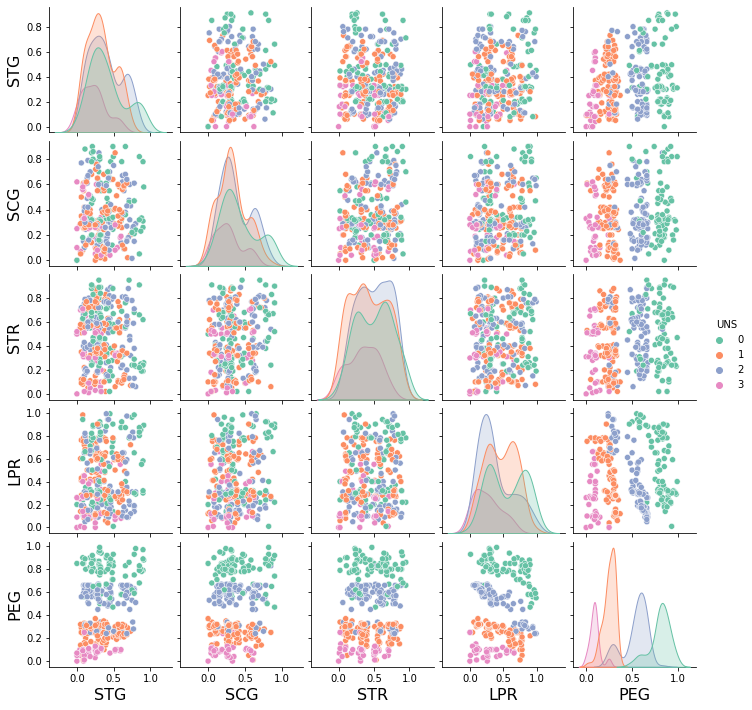

In [6]:
#Draw pairplots between all Features of Training data
sns.pairplot(data=train_data, hue='UNS',palette='Set2',diag_kind='kde',height=2)
plt.show()


### From pairplots the features LPR and PEG show clear differentiation between four classes.So LPR and PEG can be choosen for classification

# Feature Importance
Feature importance gives you a score for each feature of our data, the higher the score more important or relevant is the feature towards your output variable.we will be using Extra Tree Classifier for extracting the top 5 features for the dataset.


 


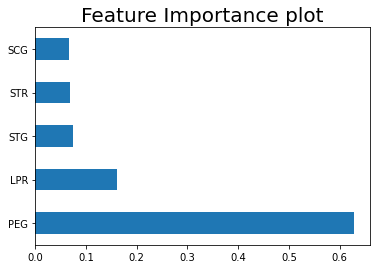

[0.07461992 0.06688667 0.06828568 0.1621624  0.62804533]


In [7]:
#input columns
X = train_data.iloc[:,0:5] 
#target column 
y = train_data.iloc[:,-1]    
model = ExtraTreesClassifier()
model.fit(X,y)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances 
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
#plot graph of feature importances 
plt.title("Feature Importance plot")
plt.show()
print(model.feature_importances_) 


### From the above graph we can say PEG and LPR  have highest feature importance.So PEG and LPR can be selected for classification

#Features Score

we will use chi-squared (chi²) statistical test of SelectKBest class of scikit-learn library to arrange the five features in descending order of their scores.

In [8]:
#input columns
X = train_data.iloc[:,0:5] 
#target column 
y = train_data.iloc[:,-1]    
#apply SelectKBest class to extract top five features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#name the columns
featureScores.columns = ['Features','Score'] 
#print 5 bestfive features and their scores
print(featureScores.nlargest(5,'Score'))


  Features      Score
4      PEG  43.305414
3      LPR   6.208698
0      STG   2.929662
1      SCG   2.207965
2      STR   2.026693


### From the above PEG and LPR have highest relationship with output

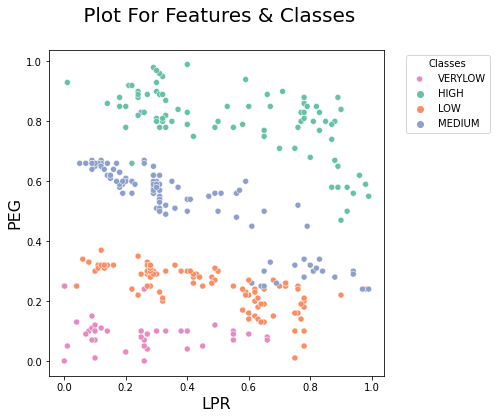

In [9]:
fig = plt.figure(figsize=(6,6))
ax=sns.scatterplot(x=train_data['LPR'], y=train_data['PEG'], hue=train_data.UNS.values,palette='Set2', data=train_data)
ax.set_title(' Plot For Features & Classes\n')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',title="Classes",labels=["VERYLOW","HIGH","LOW","MEDIUM",])
plt.show()

##We have choosen LPR and PEG features for classification because:

1.	From Seaborn Pairplots,we see that LPR and PEG features pairplots  show output classes distinctly.
2.	Feature Importance classifier showed that PEG and LPR  have highest feature  importance for classification
3.	 Features Score   showed that PEG and LPR have highest scores and hence they have relationship with output.


#SVM Classifier

In [10]:
SVM = svm.SVC(kernel='linear', gamma=1.0, C=1.0).fit(train_data[['LPR','PEG']], train_data.UNS.values)

In [11]:
# predict output using SVM
UNS_svm_pred = SVM.predict(test_data[['LPR','PEG']])


In [12]:
#Calculate accuracy score
svm_accuracy = accuracy_score(test_data.UNS.values, UNS_svm_pred)
print(svm_accuracy)

0.9125


In [13]:
#SVM confusion matrix
cf_matrix=confusion_matrix(test_data.UNS.values, UNS_svm_pred)
print(cf_matrix)

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  2 20  0]
 [ 0  5  0  6]]


In [14]:
#count of classes in test data vs predictions by SVM
test_unique, test_counts = np.unique(test_data.UNS.values, return_counts=True)

test_unique=['HIGH','LOW','MEDIUM','VERYLOW']
print('       Test Data:',dict(zip(test_unique, test_counts)))

pred_unique,pred_counts = np.unique(UNS_svm_pred, return_counts=True)
pred_unique=['HIGH','LOW','MEDIUM','VERYLOW']
print('Predicted by SVM :',dict(zip(pred_unique, pred_counts)))



       Test Data: {'HIGH': 21, 'LOW': 26, 'MEDIUM': 22, 'VERYLOW': 11}
Predicted by SVM : {'HIGH': 21, 'LOW': 33, 'MEDIUM': 20, 'VERYLOW': 6}


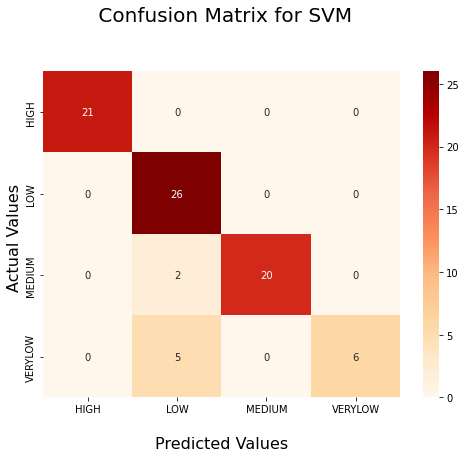

In [15]:
#Plot confusion matrix for SVM
plt.figure(figsize = (8,6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='OrRd')
ax.set_title(' Confusion Matrix for SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
# Set ticklabels
ax.xaxis.set_ticklabels(['HIGH','LOW','MEDIUM','VERYLOW'])
ax.yaxis.set_ticklabels(['HIGH','LOW','MEDIUM','VERYLOW'])
# Display  the Confusion Matrix.
plt.show()

##Meshgrid is formed from test data to plot decision boundaries

In [16]:
#Form Grid of data from features LPG and PEG
#get 'LPR' and 'PEG' from test data as 1-D array
x=np.array(test_data['LPR'])
y=np.array(test_data['PEG'])
#obtain minimum and maximum values of LPR and PEG values
x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
#Form an array x_arr  within range of min,max  of LPG and increments of 0.02 
x_arr=np.arange(x_min, x_max, 0.02)
#Form an array y_arr  within range of min,max of PEG and increments of 0.02
y_arr=np.arange(y_min, y_max, 0.02)
#Form 2D arrays from x_arr and y_arr
xx, yy = np.meshgrid(x_arr,y_arr)
#Form 1D array from 2D arrays xx and yy
xx_r=xx.ravel()
yy_r=yy.ravel()
#Form grid
xy_grid=np.c_[xx.ravel(), yy.ravel()]

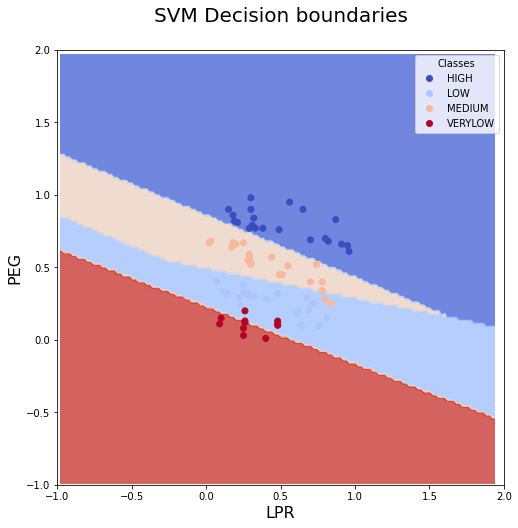

In [17]:
#Plot Decision surface for SVM Classifier
#predict outputs
Z_svm = SVM.predict(xy_grid)
#reshape 1d to 2d array
Z_svm = Z_svm.reshape(xx.shape)
#plot decision surface contour
fig = plt.figure(figsize=(8,8))
plt.contourf(xx, yy, Z_svm, cmap=plt.cm.coolwarm, alpha=0.8)
#plot test data values
sc=plt.scatter(x, y, c=test_data.UNS.values, cmap=plt.cm.coolwarm)
plt.xlabel('LPR')
plt.ylabel('PEG')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-1,-0.5,0,0.5,1.0,1.5,2.0])
plt.yticks([-1,-0.5,0,0.5,1.0,1.5,2.0])
plt.title('SVM Decision boundaries\n')
plt.legend(handles=sc.legend_elements()[0],title="Classes",labels=["HIGH", "LOW","MEDIUM","VERYLOW"])
plt.show()

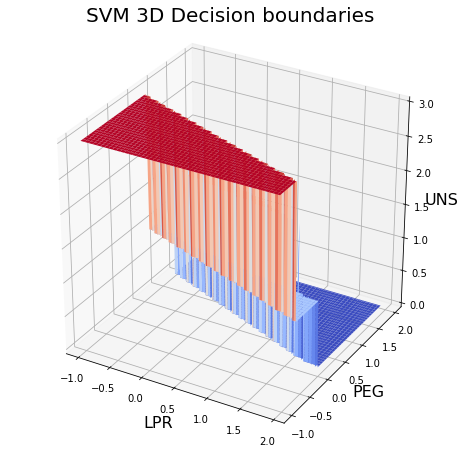

In [18]:
#plot 3d decision boundaries for SVM
fig = plt.figure(figsize=(8,8))
axes = fig.add_subplot(projection='3d')
#plot 3d decision surface
axes.plot_surface(xx, yy, Z_svm,cmap=plt.cm.coolwarm)
#axes.view_init(-120, 30)
plt.title('SVM 3D Decision boundaries\n')
axes.set_xlabel('LPR')
axes.set_ylabel('PEG')
axes.set_zlabel('UNS')
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#Perceptron Classifier

In [19]:
#Multilayer perceptron classifier
Percep = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="tanh",random_state=1).fit(train_data[['LPR','PEG']], train_data.UNS.values)

In [20]:
#predict output using Multilayer perceptron
UNS_percep_predict=Percep.predict(test_data[['LPR','PEG']])


In [21]:
#Calculate accuracy score
percep_accuracy=accuracy_score(test_data.UNS.values, UNS_percep_predict)
print(percep_accuracy)

0.9875


In [22]:
#Perceptron confusion matrix
cf_matrix=confusion_matrix(test_data.UNS.values, UNS_percep_predict)
print(cf_matrix)

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  1 21  0]
 [ 0  0  0 11]]


In [23]:
#count of classes in test data vs predictions by Perceptron

test_unique, test_counts = np.unique(test_data.UNS.values, return_counts=True)

test_unique=['HIGH','LOW','MEDIUM','VERYLOW']
print('                Test Data:',dict(zip(test_unique, test_counts)))

pred_unique,pred_counts = np.unique(UNS_percep_predict, return_counts=True)
pred_unique=['HIGH','LOW','MEDIUM','VERYLOW']
print('Predicted by Perceptron :',dict(zip(pred_unique,pred_counts)))


                Test Data: {'HIGH': 21, 'LOW': 26, 'MEDIUM': 22, 'VERYLOW': 11}
Predicted by Perceptron : {'HIGH': 21, 'LOW': 27, 'MEDIUM': 21, 'VERYLOW': 11}


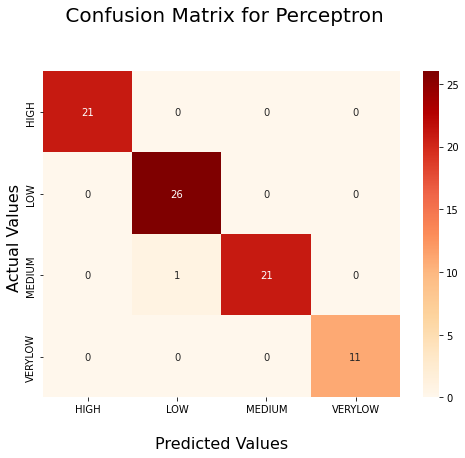

In [24]:
#Plot confusion matrix for Perceptron
plt.figure(figsize = (8,6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='OrRd')
ax.set_title(' Confusion Matrix for Perceptron\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## set tick labels
ax.xaxis.set_ticklabels(['HIGH','LOW','MEDIUM','VERYLOW'])
ax.yaxis.set_ticklabels(['HIGH','LOW','MEDIUM','VERYLOW'])
## Display the Confusion Matrix.
plt.show()

# Perceptron Classifiers  decision boundaries

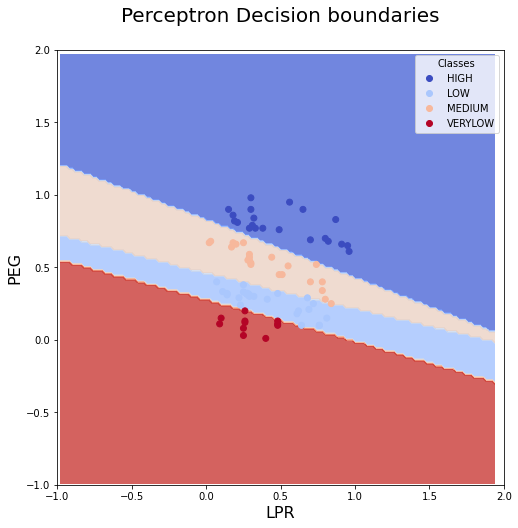

In [25]:
#Plot Decision surface for Perceptron Classifier
#predict outputs
Z_percep = Percep.predict(np.c_[xx.ravel(), yy.ravel()])
#reshape 1d to 2d array
Z_percep = Z_percep.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
#plot decision surface contour
plt.contourf(xx, yy, Z_percep, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(x, y, c=test_data.UNS.values, cmap=plt.cm.coolwarm)
plt.xlabel('LPR',fontdict={'fontsize': 16, 'fontweight': 'medium'})
plt.ylabel('PEG')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-1,-0.5,0,0.5,1.0,1.5,2.0])
plt.yticks([-1,-0.5,0,0.5,1.0,1.5,2.0])
plt.title('Perceptron Decision boundaries\n')
plt.legend(handles=sc.legend_elements()[0],title="Classes",labels=["HIGH", "LOW","MEDIUM","VERYLOW"])
plt.show()

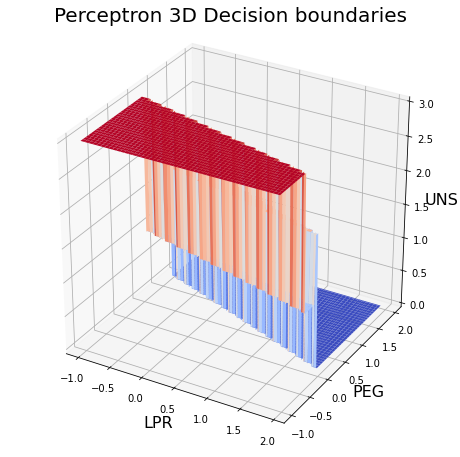

In [26]:
fig = plt.figure(figsize=(8,8))
axes = fig.add_subplot(projection='3d')
#plot 3d decision surface
axes.plot_surface(xx, yy, Z_percep,cmap=plt.cm.coolwarm)
#axes.view_init(0, -20)
plt.title('Perceptron 3D Decision boundaries\n')
axes.set_xlabel('LPR')
axes.set_ylabel('PEG')
axes.set_zlabel('UNS')
plt.show()

##Conclusion
 1. LabelEncoder is used to convert categorical class labels under the ”UNS”
column to numerical values for both training and testing data.
 2. Using Pairplots,SelectKBestclass and Feature Importance LPR and PEG are  selected from UMD dataset to apply SVM and Perceptron algorithms for classification.
 3. Testing data is classified by using SVM.

      SVM accuracy=0.9125

      SVM Confusion Matrix
                [[21  0  0  0]
                 [ 0 26  0  0]
                 [ 0  2 20  0]
                 [ 0  5  0  6]]

      SVM Decision boundaries are plotted

 4. Testing data is classified by using Perceptron.

      Perceptron accuracy=0.9875

      Perceptron Confusion Matrix
                [[21  0  0  0]
                 [ 0 26  0  0]
                 [ 0  1 21  0]
                 [ 0  0  0  11]]

       Perceptron Decision boundaries are plotted